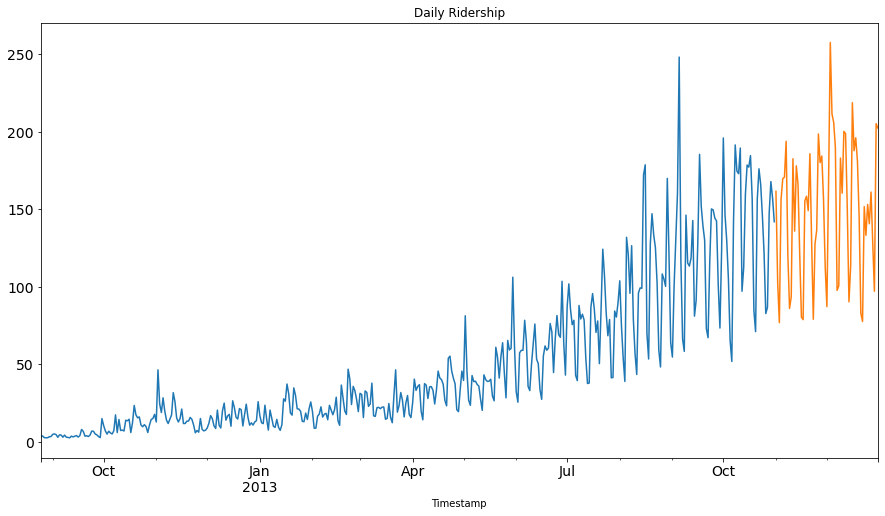

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Subsetting the dataset
# Index 11856 marks the end of year 2013
df = pd.read_csv('jetrail.csv', nrows=11856)
 
# Creating train and test set
# Index 10392 marks the end of October 2013
train = df[0:10392]
test = df[10392:]
 
# Aggregating the dataset at daily level
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')  # 4位年用Y，2位年用y
df.index = df['Timestamp']
df = df.resample('D').mean() #按天采样，计算均值
 
train['Timestamp'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']
train = train.resample('D').mean() #
 
test['Timestamp'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']
test = test.resample('D').mean()
 
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

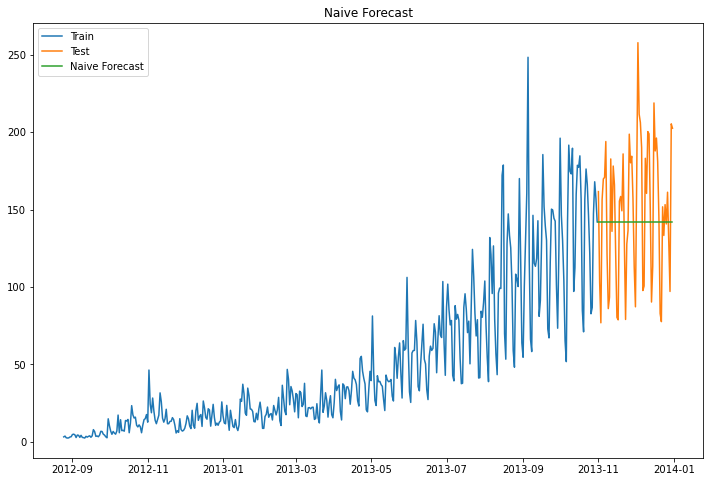

In [2]:
import numpy as np

dd = np.asarray(train['Count'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]
plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
rms = sqrt(mean_squared_error(test['Count'], y_hat['naive']))
print(rms)

43.91640614391676


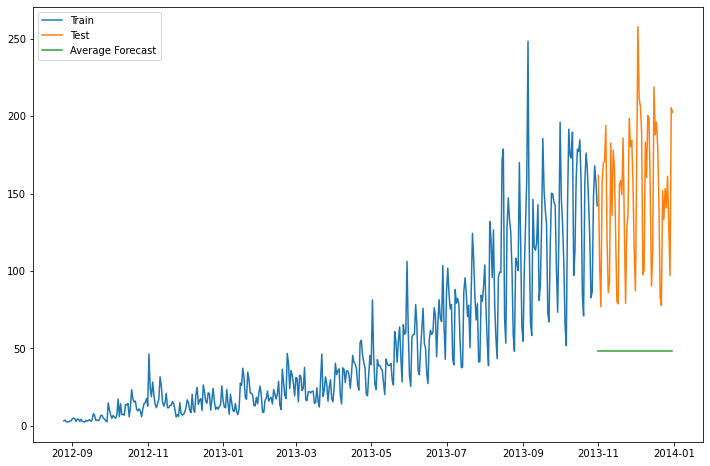

In [4]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


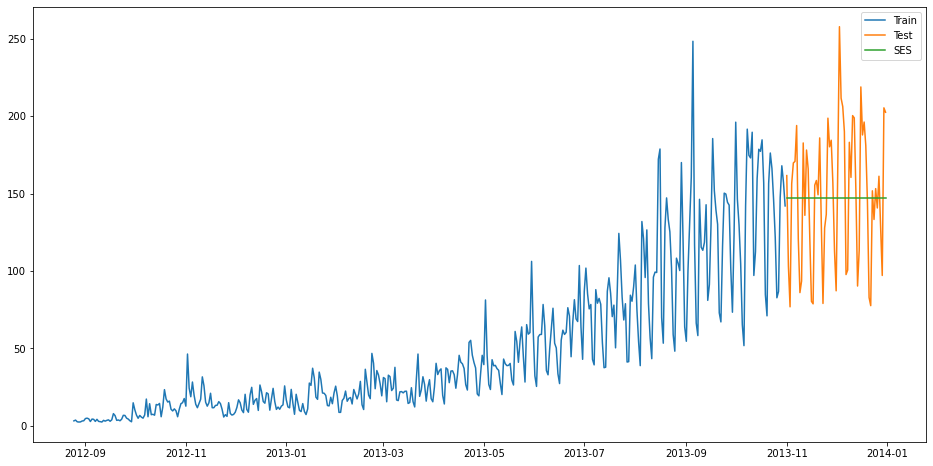

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing
 
y_hat_avg = test.copy()
fit = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()